### Computational Guided Inquiry for PChem (Neshyba, 2021)

# Numerical $\mu$

## Introduction

As a reminder, a van der Waals gas is defined according to 

$$
P(T,V) = {{n R T} \over {V - nb}} - {{n^2 a} \over V^2}  \ \ \ \ (1)
$$

where $a$ is understood to be a measure of the attractions between molecules, and $b$ is understood to be a measure of the repulsions between molecules. The quantity ${{n^2 a} \over V^2}$ has to have dimensions pressure, since it's being subtracted from ${{n R T} \over {V - nb}}$, which definitely has dimensions pressure. In previous work, we've found that the isothermal Joule coefficient -- the slope of $U(T,V)$ in the volume direction -- is given by

$$
\pi_T = \frac {n^2 a} {V^2} \ \ \ \ (2)
$$

for a van der Waals gas. You'll notice that $\pi_T$ is exactly the negative of the second term in Eq. (1)!. Therefore it must have dimensions pressure! Putting these ideas together, $\pi_T$ is sometimes referred to as the *negative internal pressure* of a gas due to attractions between molecules.

We've also found that the isothermal Joule-Thomson coefficient (which we've called $\mu_T$) is given approximately by

$$
\mu_T = bn - \frac {2an} {RT} \ \ \ \ (3)
$$

for a van der Waals gas. The *adiabatic* Joule-Thomson coeffient -- which is the quantity one measures in an adiabatic Joule-Thomson experiment -- is related by

$$
\mu = - \frac {\mu_T} {C_p} \ \ \ \ (4)
$$

Here, we'll exampine $\pi_T$, $\mu_T$, and $\mu$ over a range of temperatures. As you'll see, but $\mu_T$ and $\mu$ are both functions of temperature. In fact, the temperature at which $\mu_T$ and $\mu$ cross (it's the same temperature whichever one you look at) is the *inversion temperature*.


## Learning Goals
1. Gain some practice finding and using van der Waals parameters to calculate $\pi_T$, $\mu_T$ and $\mu$
1. Gain familiarity with the behavior of $\mu_T$ and $\mu$ as a function of temperature, and how that relates to the inversion temperature

In [7]:
# Import resources stored in the Pchem Library
%run ../PchemLibrary/ImportResources.ipynb

### Finding vdw parameters for $H_2$
Look up vdw parameters $a$ and $b$ for $H_2$ (e.g., https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)), and create those two variables (using AssignQuantity) in the cell below.

In [8]:
# Specify vdw parameters for H2
### BEGIN SOLUTION ###
# For H2
a = AssignQuantity(0.2475,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.02661,'L /mol'); print(b)

# # For N2 ... this produces an inversion temperature that's 250 degrees too high, however
# a = AssignQuantity(1.370,'L^2 bar / mol^2'); print(a)
# b = AssignQuantity(0.0387,'L /mol'); print(b)

### END SOLUTION ###

0.2475 bar * liter ** 2 / mole ** 2
0.02661 liter / mole


### Specifying the state of the system
Below, we specify the state of the system: one mole of $H_2$ gas in a volume of $20 \ L$, for a range of temperatures. 

In [9]:
# The gas constant
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

# Scalar values for moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
V = AssignQuantity(20,'L'); print(V)

# We'll be using a range of temperatures
T = AssignQuantity(np.linspace(100,1000),'K'); print(T)

0.082057 liter * standard_atmosphere / kelvin / mole
1 mole
20 liter
[100.0 118.36734693877551 136.73469387755102 155.10204081632654 173.46938775510205 191.83673469387756 210.20408163265307 228.57142857142858 246.9387755102041 265.30612244897964 283.6734693877551 302.0408163265306 320.40816326530614 338.7755102040817 357.14285714285717 375.51020408163265 393.8775510204082 412.24489795918373 430.6122448979592 448.9795918367347 467.34693877551024 485.7142857142858 504.08163265306126 522.4489795918367 540.8163265306123 559.1836734693878 577.5510204081634 595.9183673469388 614.2857142857143 632.6530612244899 651.0204081632653 669.3877551020408 687.7551020408164 706.1224489795919 724.4897959183675 742.8571428571429 761.2244897959184 779.591836734694 797.9591836734694 816.3265306122449 834.6938775510205 853.061224489796 871.4285714285716 889.795918367347 908.1632653061225 926.5306122448981 944.8979591836735 963.265306122449 981.6326530612246 1000.0] kelvin


### Calculating $\pi_T$ 
With the help of Eq. (2), calculate (and print) $\pi_T$ using state variables you specified above.

In [10]:
# Calculate pi_T for this range of states
### BEGIN SOLUTION ###
pi_T = a*n**2/V**2
print(pi_T)
### END SOLUTION ###

0.0006187499999999999 bar


### Pause for analysis
The main take-home is to notice that $\pi_T$ really does have dimensions pressure. 

### Calculating $\mu_T$
With the help of Eq. (3), calculate (and print) $\mu_T$ using the state variables you specified above. Since $\mu_T$ depends on temperature, make a plot of $\mu_T$ as a function of $T$.

<IPython.core.display.Javascript object>


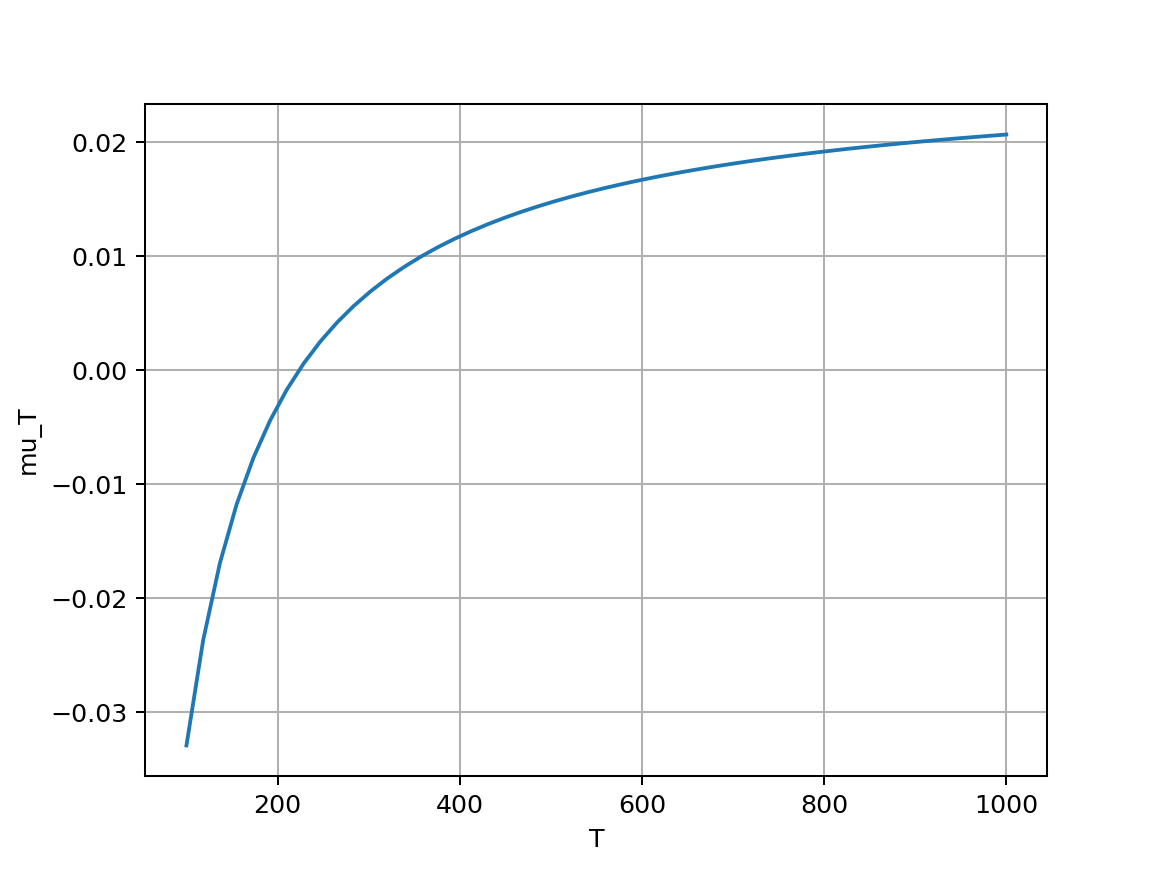

Text(0, 0.5, 'mu_T')

In [13]:
# Calculate and plot mu_T as a function of temperature
### BEGIN SOLUTION ###
mu_T = b*n - 2*a*n/(R*T)
plt.figure()
plt.plot(T,mu_T)
plt.grid(True)
plt.xlabel("T")
plt.ylabel("mu_T")
### END SOLUTION ###

### Calculating $\mu$
For the same range of temperatures, use Eq. (4) to calculate $\mu$ (calling your variable "mu"). Then make a plot of $\mu$ as a function of $T$. You'll need the heat capacity of $H_2$ for this -- you can use the high-temperature limit (don't forget to add $nR$ to convert $C_V$ to $C_P$). Also, for comparison with the literature, you should convert your $\mu$ to units K/bar.

0.2871995 liter * standard_atmosphere / kelvin
0.3692565 liter * standard_atmosphere / kelvin
kelvin / bar


<IPython.core.display.Javascript object>


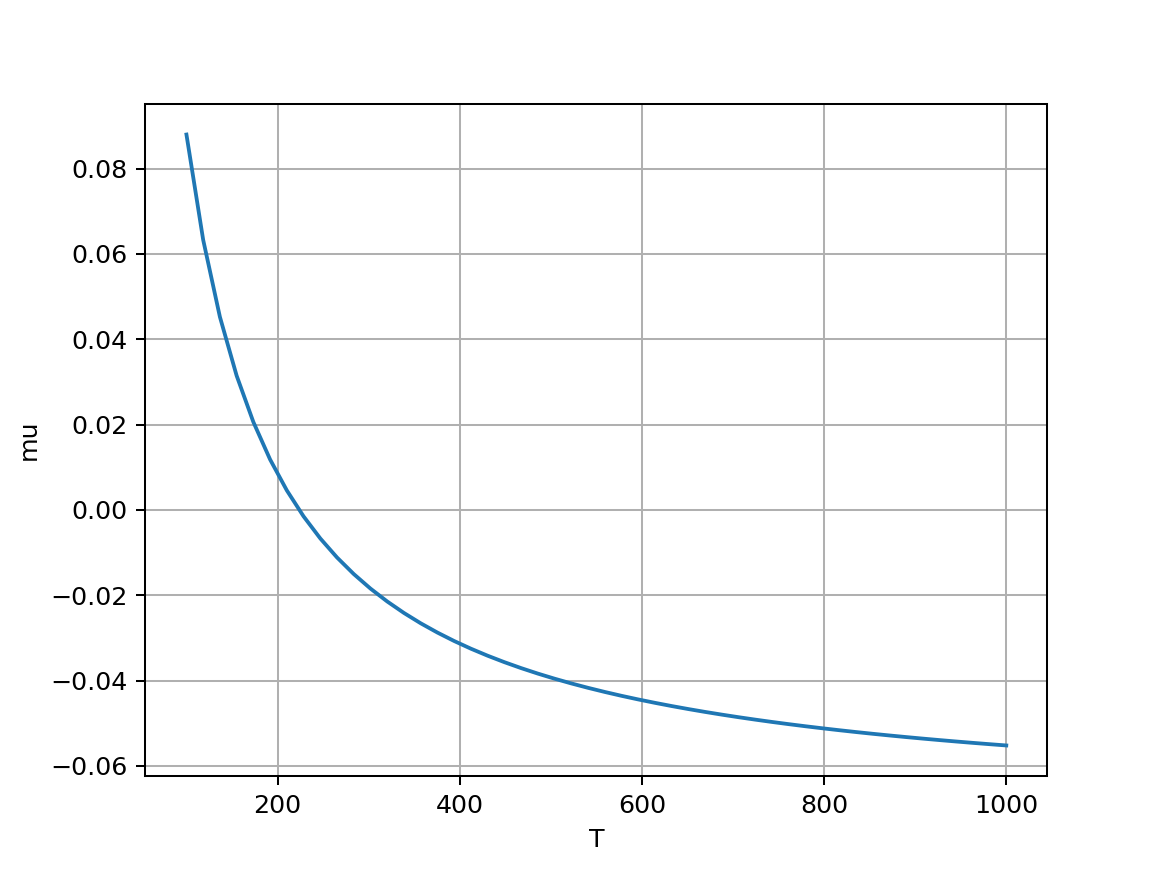

Text(0, 0.5, 'mu')

In [14]:
# Calculate Cv and Cp for N2 in the high-temperature limit
### BEGIN SOLUTION ###
Cv = AssignQuantity(7/2*R*n); print(Cv)
Cp = AssignQuantity(Cv + R*n); print(Cp)
### END SOLUTION ###

# Calculate mu for these temperatures, convert to K/bar, and plot as a function of temperature
### BEGIN SOLUTION ###
mu = -mu_T/Cp
mu.ito('K/bar')
print(mu.units)
plt.figure()
plt.plot(T,mu)
plt.grid(True)
plt.xlabel("T")
plt.ylabel("mu")
### END SOLUTION ###

### Pause for analysis
In the cell below, comment on how well your result lines up with the literature (see, e.g., https://en.wikipedia.org/wiki/Joule-Thomson_effect). For example, is the curve qualitatively correct? What's the inversion temperature your results predict, compared to Wikipedia's?